In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score

# Load data

In [2]:
data = pd.read_csv('../input/churn-for-bank-customers/churn.csv', index_col='RowNumber')\
    .drop(['Surname', 'CustomerId'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [4]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# Prepare data

In [5]:
def label_encoder(data_: pd.DataFrame(), columns_name_: list):
    le = LabelEncoder()
    for i in columns_name_:
        le.fit(data_[i])
        data_[i] = le.transform(data_[i])
    return data_

In [6]:
data = label_encoder(data, ['Geography', 'Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,0,36,7,0.00,1,0,1,42085.58,1


## Data visualization

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


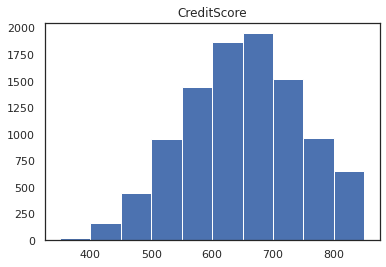

In [7]:
print(data.CreditScore.describe())

plt.title('CreditScore')
plt.hist(data.CreditScore)
plt.show()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


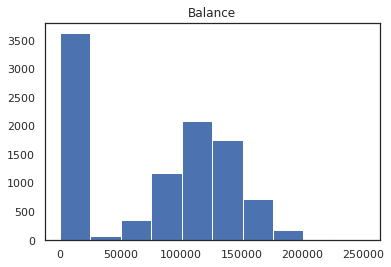

In [8]:
print(data.Balance.describe())

plt.title('Balance')
plt.hist(data.Balance)
plt.show()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


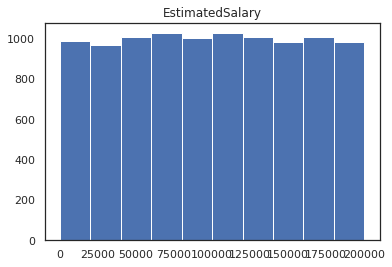

In [9]:
print(data.EstimatedSalary.describe())

plt.title('EstimatedSalary')
plt.hist(data.EstimatedSalary)
plt.show()

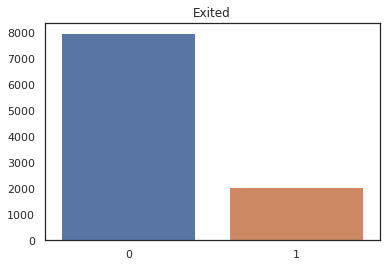

In [10]:
plt.title('Exited')

sns.barplot(x=data['Exited'].value_counts().keys(),
            y=data['Exited'].value_counts().values)

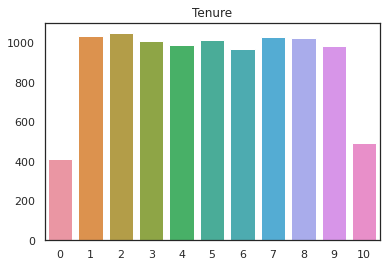

In [11]:
plt.title('Tenure')

sns.barplot(x=data['Tenure'].value_counts().keys(),
            y=data['Tenure'].value_counts().values)

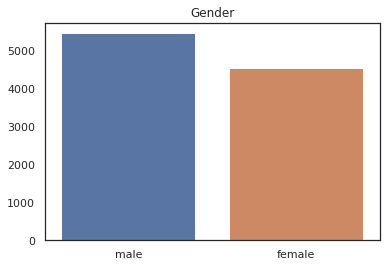

In [12]:
plt.title('Gender')

sns.barplot(x=['male', 'female'],
            y=data['Gender'].value_counts().values)

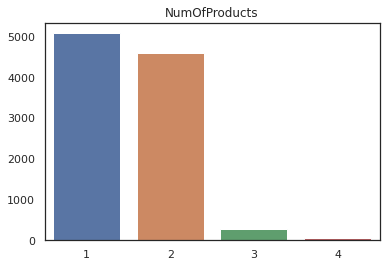

In [13]:
plt.title('NumOfProducts')

sns.barplot(x=data['NumOfProducts'].value_counts().keys(),
            y=data['NumOfProducts'].value_counts().values)

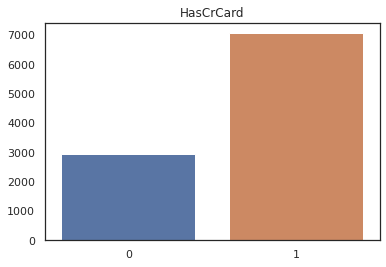

In [14]:
plt.title('HasCrCard')

sns.barplot(x=data['HasCrCard'].value_counts().keys(),
            y=data['HasCrCard'].value_counts().values)

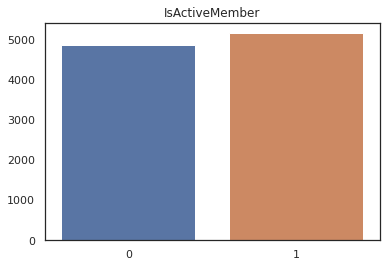

In [15]:
plt.title('IsActiveMember')

sns.barplot(x=data['IsActiveMember'].value_counts().keys(),
            y=data['IsActiveMember'].value_counts().values)

Min: 18 
Max: 92


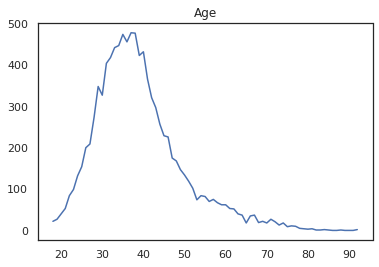

In [16]:
print('Min:', data['Age'].min(),
      '\nMax:', data['Age'].max())
val_count = data['Age'].value_counts()
plt.title('Age')
plt.plot([i for i in range(data['Age'].min(), data['Age'].max() + 1)],
         [val_count[i] if i in val_count else 0 for i in range(data['Age'].min(), data['Age'].max() + 1)])

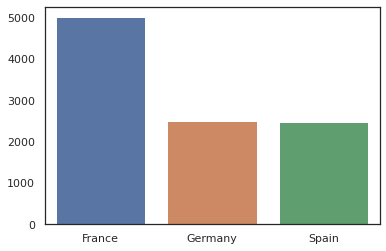

In [17]:
sns.barplot(x=['France', 'Germany', 'Spain'],
            y=[*data['Geography'].value_counts().values])

In [18]:
data['Geography'].value_counts().values

array([5014, 2509, 2477])

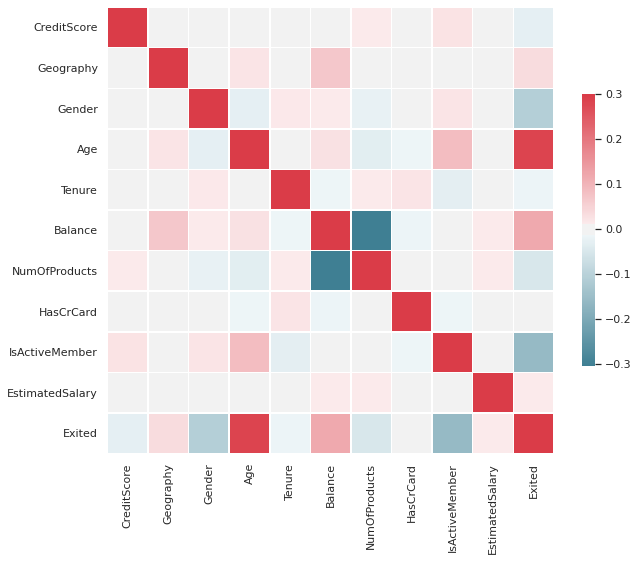

In [19]:
sns.set(style="white")

corr = data.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=None, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

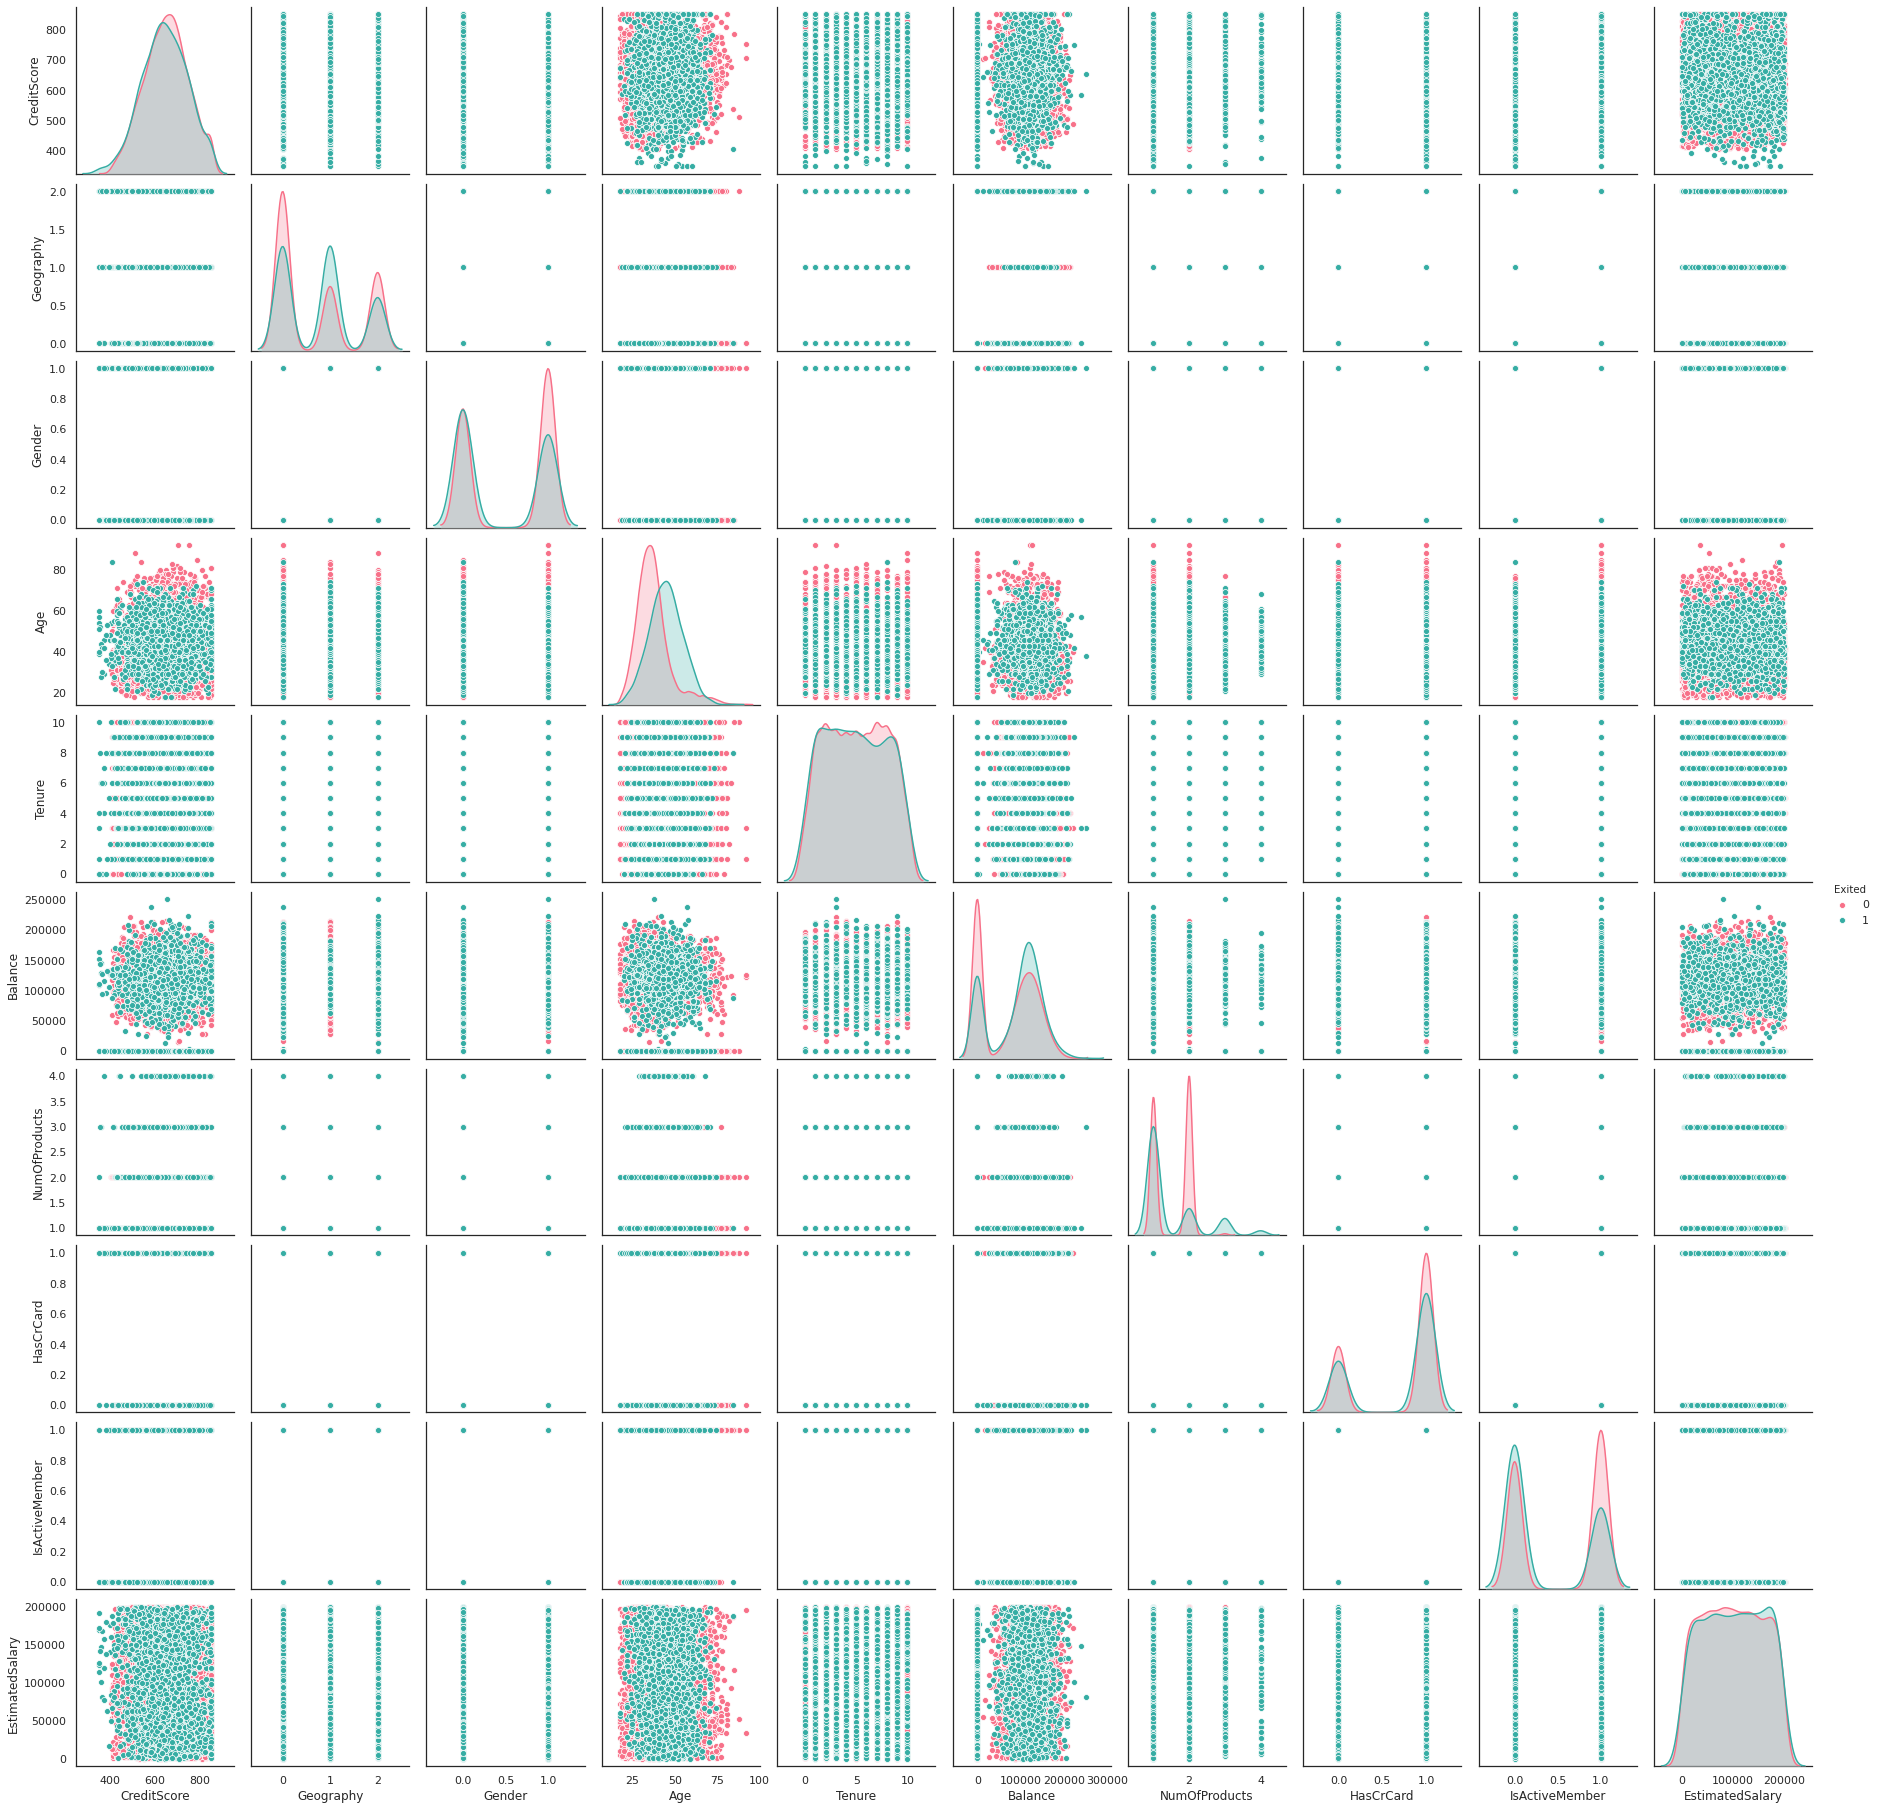

In [20]:
sns.set(style="white")

sns.pairplot(data, hue="Exited", palette="husl")

## Split data

In [21]:
final_score = {}

In [51]:
x_tr, x_te, y_tr, y_te = train_test_split(
    data.iloc[:, :-1], data['Exited'], random_state=42, test_size=0.2, shuffle=True)
x_tr, x_val, y_tr, y_val = train_test_split(
    x_tr, y_tr, random_state=42, test_size=0.2, shuffle=True)
print(x_tr.shape)
print(x_val.shape)
print(x_te.shape)

(6400, 10)
(1600, 10)
(2000, 10)


# Train models and predict

In [52]:
def calc_score(y_true, y_pred, y_pred_proba=None):
    return pd.DataFrame(data={'metrics': ['auc', 'acc', 'f1', 'recall'],
                              'single model': [roc_auc_score(y_true, y_pred_proba).round(3)\
                                               if y_pred_proba is not None else '-',
                                               accuracy_score(y_true, y_pred).round(3),
                                               f1_score(y_true, y_pred).round(3),
                                               recall_score(y_true, y_pred).round(3)]})

## Test sklearn models

In [53]:
import copy

def kfold(model, split, X, y, x_test):
    pred_cross_val = []
    kf = KFold(n_splits=split, shuffle=False)
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model_ = copy.copy(model)
        model_.fit(X_train, y_train)
        pred_cross_val.append(model_.predict(x_test))
    pred_cross_val = np.array(pred_cross_val).mean(axis=0)
    pred_cross_val = np.around(pred_cross_val)
    return pred_cross_val

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
score = calc_score(y_val, lr.predict(x_val))

pred_cross_val = kfold(LogisticRegression(), 2, x_tr.values, y_tr.values, x_val)
score['cross. val. model'] = calc_score(y_val, pred_cross_val)['single model']

pred_cross_val = kfold(LogisticRegression(), 2, x_tr.values, y_tr.values, x_te)
final_score['LogisticRegression'] = calc_score(y_te, pred_cross_val)['single model'][1]
score

,metrics,single model,cross. val. model
0,auc,-,-
1,acc,0.789,0.79
2,f1,0.092,0.072
3,recall,0.052,0.04


In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10)
knn.fit(x_tr, y_tr)
score = calc_score(y_val, knn.predict(x_val))


pred_cross_val = kfold(KNeighborsClassifier(10), 2, x_tr.values, y_tr.values, x_val)
score['cross. val. model'] = calc_score(y_val, pred_cross_val)['single model']

pred_cross_val = kfold(KNeighborsClassifier(10), 2, x_tr.values, y_tr.values, x_te)
final_score['KNeighborsClassifier'] = calc_score(y_te, pred_cross_val)['single model'][1]
score

,metrics,single model,cross. val. model
0,auc,-,-
1,acc,0.786,0.795
2,f1,0.023,0
3,recall,0.012,0


## Test gradboost

In [56]:
from catboost import CatBoostClassifier

catb = CatBoostClassifier(learning_rate=0.1, boosting_type='Ordered', verbose=0)
catb.fit(x_tr, y_tr, eval_set=(x_val, y_val), use_best_model=True)
score = calc_score(y_val, catb.predict(x_val), catb.predict_proba(x_val)[:, 1])
final_score['CatBoostClassifier'] = calc_score(y_te, catb.predict(x_te),
                                        catb.predict_proba(x_te)[:, 1])['single model'][1]
score

,metrics,single model
0,auc,0.878
1,acc,0.861
2,f1,0.571
3,recall,0.453


In [57]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=100)
lgbm.fit(x_tr, y_tr)
score = calc_score(y_val, lgbm.predict(x_val), lgbm.predict_proba(x_val)[:, 1])
final_score['LGBMClassifier'] = calc_score(y_te, lgbm.predict(x_te),
                                              lgbm.predict_proba(x_te)[:, 1])['single model'][1]
score

,metrics,single model
0,auc,0.861
1,acc,0.859
2,f1,0.591
3,recall,0.498


## Gradboost ensemble

In [58]:
pred = []
pred_proba = []
pred.append(catb.predict(x_te))
pred_proba.append(catb.predict_proba(x_te)[:, 1])
pred.append(lgbm.predict(x_te))
pred_proba.append(lgbm.predict_proba(x_te)[:, 1])
pred = np.array(pred).mean(axis=0).round()
pred_proba = np.array(pred_proba).mean(axis=0)

calc_score(y_te, pred, pred_proba)

,metrics,single model
0,auc,0.872
1,acc,0.870
2,f1,0.573
3,recall,0.445


## Test Neural Networks

In [59]:
import keras
from keras.layers import Dense, Dropout, LeakyReLU
from keras import Sequential
from keras.metrics import Accuracy, AUC
from keras.optimizers import Adam

In [132]:
def ploting(history):
    # print(history.history.keys())
    ac = []
    for i in history.history.keys():
        ac.append(i)
    loss = history.history[ac[0]]
    val_loss = history.history[ac[2]]
    acc = history.history[ac[1]]
    val_acc = history.history[ac[3]]
    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    ax1.plot(epochs, loss, 'bo', label='Training loss')
    ax1.plot(epochs, val_loss, 'b', label='Validation loss', color='r')
    ax1.set_title('Training and validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax2.plot(epochs, acc, 'bo', label='Training acc')
    ax2.plot(epochs, val_acc, 'b', label='Validation acc', color='r')
    ax2.set_title('Training and validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('AUC')
    ax2.legend()
    for ax in fig.axes:
        ax.grid(True)
    plt.show()


### Prepare data for NN

In [133]:
scaler = StandardScaler()
scaler.fit(data.iloc[:, :-1])
scaler.transform(x_tr)

x_tr_prepare = scaler.transform(x_tr)
x_val_prepare = scaler.transform(x_val)
x_te_prepare = scaler.transform(x_te)

y_tr_prepare = y_tr.values.reshape(-1, 1)
y_val_prepare = y_val.values.reshape(-1, 1)
y_te_prepare = y_te.values.reshape(-1, 1)


### Create model

In [134]:
activation = LeakyReLU(alpha=0.5)

model = Sequential()
model.add(Dense(64, input_dim=x_tr.shape[-1], activation=activation))
model.add(Dense(64, activation=activation))
model.add(Dropout(0.2))
model.add(Dense(32, activation=activation))
model.add(Dense(32, activation=activation))
model.add(Dropout(0.2))
model.add(Dense(16, activation=activation))
model.add(Dense(16, activation=activation))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(optimizer=Adam(lr=0.001, beta_1=0.9),
              loss='binary_crossentropy',
              metrics=[AUC()])

hist = model.fit(x_tr_prepare, y_tr_prepare,
          batch_size=64, epochs=50,
          validation_data=(x_val_prepare, y_val_prepare))

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_83 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_52 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_84 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_85 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_53 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 16)              

Epoch 48/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3421 - auc_45: 0.8624 - val_loss: 0.3401 - val_auc_45: 0.8590
Epoch 49/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3442 - auc_45: 0.8568 - val_loss: 0.3380 - val_auc_45: 0.8672
Epoch 50/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3403 - auc_45: 0.8622 - val_loss: 0.3406 - val_auc_45: 0.8652


### Predict

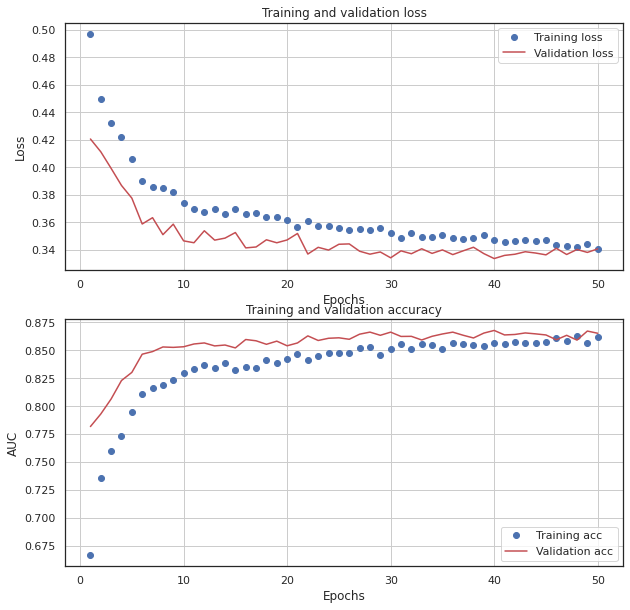

In [135]:
ploting(hist)

In [136]:
score = calc_score(y_val_prepare,
                      model.predict(x_val_prepare).reshape(-1).round(),
                      model.predict(x_val_prepare).reshape(-1))
final_score['NeuroClassifier'] = calc_score(y_te_prepare,
                model.predict(x_te_prepare).reshape(-1).round(),
                model.predict(x_te_prepare).reshape(-1))['single model'][1]
score

,metrics,single model
0,auc,0.865
1,acc,0.856
2,f1,0.513
3,recall,0.370


## Test Convolution Neural Networks

In [137]:
import keras
from keras.layers import (Dropout, LeakyReLU, Conv1D,
                          MaxPooling1D, GlobalAveragePooling1D, BatchNormalization)
from keras import Sequential
from keras.metrics import Accuracy, AUC
from keras.optimizers import Adam

### Create model

In [139]:
activation = 'relu'

model = Sequential()
model.add(Conv1D(64, 3, input_shape=(10, 1), padding='same', activation=activation))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Conv1D(32, 3, padding='same', activation=activation))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=[AUC()])

print(x_tr_prepare.reshape(-1, x_tr.shape[1], 1).shape)
print(x_val_prepare.reshape(-1, x_tr.shape[1], 1).shape)
hist = model.fit(x_tr_prepare.reshape(-1, x_tr.shape[1], 1), y_tr_prepare,
          batch_size=256, epochs=100,
          validation_data=(x_val_prepare.reshape(-1, x_val.shape[1], 1),
                           y_val))

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_71 (Conv1D)           (None, 10, 64)            256       
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 5, 64)             256       
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 5, 32)             6176      
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 2, 32)             0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 2, 32)             128       
_________________________________________________________________
global_average_pooling1d_39  (None, 32)              

Epoch 49/100
25/25 [==============================] - 0s 9ms/step - loss: 0.4015 - auc_47: 0.8362 - val_loss: 0.3893 - val_auc_47: 0.8514
Epoch 50/100
25/25 [==============================] - 0s 9ms/step - loss: 0.4056 - auc_47: 0.8329 - val_loss: 0.3866 - val_auc_47: 0.8521
Epoch 51/100
25/25 [==============================] - 0s 13ms/step - loss: 0.4035 - auc_47: 0.8300 - val_loss: 0.3845 - val_auc_47: 0.8523
Epoch 52/100
25/25 [==============================] - 0s 10ms/step - loss: 0.3964 - auc_47: 0.8347 - val_loss: 0.3836 - val_auc_47: 0.8520
Epoch 53/100
25/25 [==============================] - 0s 10ms/step - loss: 0.3967 - auc_47: 0.8330 - val_loss: 0.3826 - val_auc_47: 0.8520
Epoch 54/100
25/25 [==============================] - 0s 9ms/step - loss: 0.3968 - auc_47: 0.8309 - val_loss: 0.3794 - val_auc_47: 0.8522
Epoch 55/100
25/25 [==============================] - 0s 9ms/step - loss: 0.3931 - auc_47: 0.8347 - val_loss: 0.3794 - val_auc_47: 0.8519
Epoch 56/100
25/25 [===========

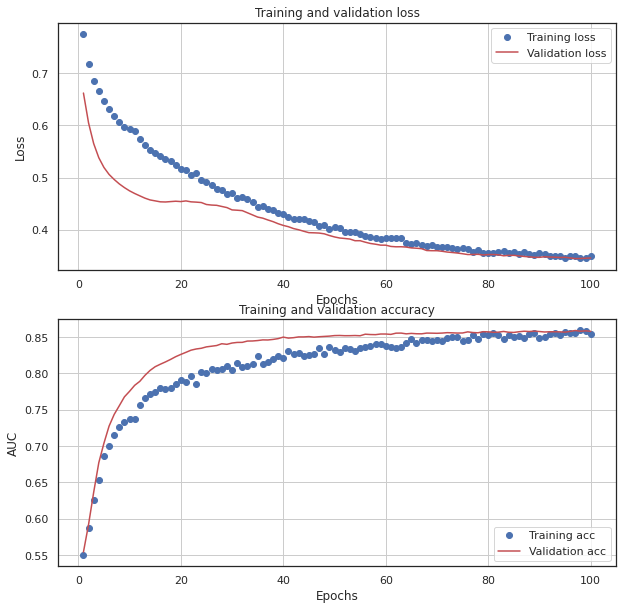

In [140]:
ploting(hist)

### Predict

In [141]:
score = calc_score(y_val_prepare,
                      model.predict(x_val_prepare.reshape(-1, x_tr.shape[1], 1)).reshape(-1).round(),
                      model.predict(x_val_prepare.reshape(-1, x_tr.shape[1], 1)).reshape(-1))
final_score['CNNClassifier'] = calc_score(y_te_prepare,
                model.predict(x_te_prepare.reshape(-1, x_tr.shape[1], 1)).reshape(-1).round(),
                model.predict(x_te_prepare.reshape(-1, x_tr.shape[1], 1)).reshape(-1))['single model'][1]
score

,metrics,single model
0,auc,0.858
1,acc,0.863
2,f1,0.594
3,recall,0.489


# Score

In [142]:
final_score

{'LogisticRegression': 0.8,
 'KNeighborsClassifier': 0.802,
 'CatBoostClassifier': 0.87,
 'LGBMClassifier': 0.868,
 'NeuroClassifier': 0.854,
 'CNNClassifier': 0.852}

# Models' rating

In [143]:
import operator
sort_dict = sorted(final_score.items(), key=operator.itemgetter(1), reverse=True)
sort_dict

[('CatBoostClassifier', 0.87),
 ('LGBMClassifier', 0.868),
 ('NeuroClassifier', 0.854),
 ('CNNClassifier', 0.852),
 ('KNeighborsClassifier', 0.802),
 ('LogisticRegression', 0.8)]

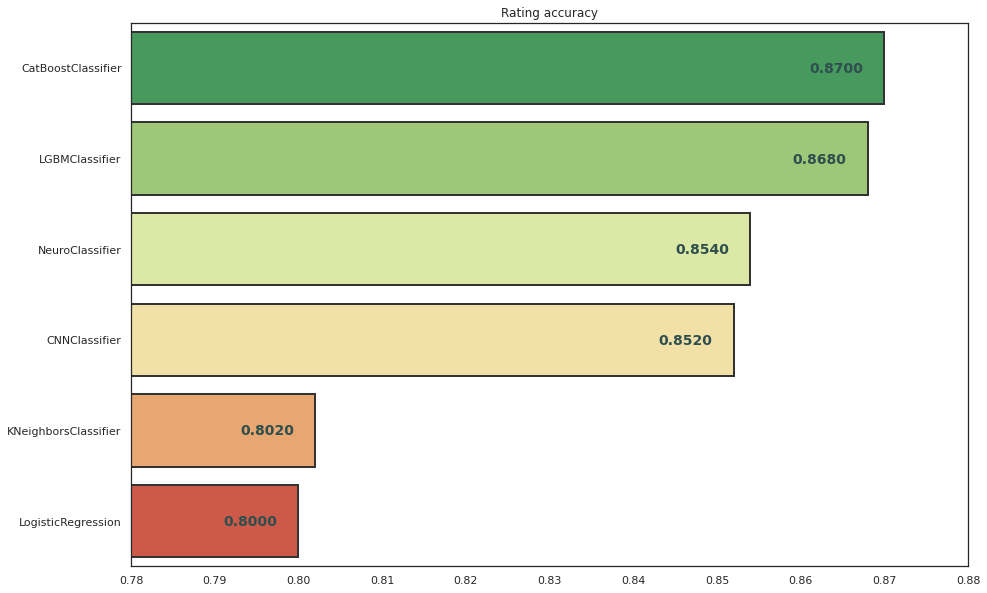

In [144]:
def visualize(column=0):
    y = [x[1] for x in sort_dict]
    labels = [x[0] for x in sort_dict]
    shift = 0.78
    plt.figure(figsize=(15, 10))
    graph = sns.barplot(x=(np.asarray(y) - shift), y=labels,
                        palette=sns.color_palette("RdYlGn_r", len(y)),
                        edgecolor=".2", linewidth=2)
    plt.xticks([i / 100 for i in range(0, 11)], ["%.2f" % (i / 100 + shift) for i in range(0, 11)])
    for i, v in enumerate(y):
        graph.text(v - shift - 0.009, i + 0.05, "%.4f" % v, color='darkslategray', fontweight='bold', size=14)
    plt.title('Rating accuracy')
    plt.show()

visualize(0)